**<center><font size=6>CS490: Machine Learning<br>Homework 1</font></center>**

In this assignment, you will create a kNN classifier for the Fisher Iris dataset. You will not have to create a kNN learning from scratch; rather, you will use the kNN learner provided in the mltools library. However, you may find it helpful to explore the provided kNN implementation and understand how it works. 

The sections below will take you through the machine learning process as follows:
1. Divide the data into training and validation sets
2. Learn a classifier for k nearest neighbors
3. Measure the prediction error for your classifier
4. Repeat steps 2 and 3 for different values of k to find the best model

# Setting Up the Data
The first step in creating your classifier is to load the data. 
As before, you will be using the "Fisher iris" data set (in the `data` directory). Run the following block to load the iris data into your notebook:

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None)  # load the data
Y = iris[:,-1]              # target value (iris species) is the last column
X = iris[:,0:-1]            # features are the other columns
# Note: indexing with ":" indicates all values (in this case, all rows);
#  indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns);
#  indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

Now, we will shuffle and split the data into training and validation subsets. We shuffle the data to randomize which data points end up as training data and which end up as validation to try and remove any potential bias introduced by the order the data is stored in the file.

To do this, we will be using some data manipulation routines from the provided class code (`mltools`). Run the block of code below to shuffle the data and divide it into training and testing sets.

In [3]:
import mltools as ml

np.random.seed(0)           # set the random number seed
X,Y = ml.shuffleData(X,Y)  # shuffle data randomly
# (This is a good idea in case your data are ordered in some systematic way.)

Xtrain,Xval,Ytrain,Yval = ml.splitData(X,Y, 0.75)  # split data into 75/25 train/validation

Make sure to set the random number seed to 0 before calling `shuffleData` as in the example above (and in general, for every assignment). This ensures consistent behavior each time the code is run.

# kNN Learning
Our learners (the parameterized functions that do the prediction) will be defined as python objects, based on either a generic classifier or generic regressor class.  The base classes
have a few useful functions, such as computing error rates or other measures of quality.  More
importantly, the learners  all follow a generic behavioral pattern, allowing us to train
the function on one data set (i.e., set the parameters of the model to perform well on those data),
and then make predictions on another data set.

You can now build and *train* a kNN classifier on {Xtrain,Ytrain} and make predictions on some data {Xval} with it:

In [4]:
K = 1                         # set an initial value for K
knn = ml.knn.knnClassify()    # create the object and train it
knn.train(Xtrain, Ytrain, K)  # where K is an integer, e.g. 1 for nearest neighbor prediction
YvalHat = knn.predict(Xval)   # get estimates of y for each data point in Xval
print(YvalHat)

# Alternatively, the constructor provides a shortcut to "train":
knn = ml.knn.knnClassify( Xtrain, Ytrain, K )
YvalHat = knn.predict(Xval)
print(YvalHat)

[0. 2. 0. 2. 0. 0. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 0. 1. 2.
 2. 0. 1. 1. 1. 1. 0. 0. 0. 2. 1. 2. 0.]
[0. 2. 0. 2. 0. 0. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 0. 1. 2.
 2. 0. 1. 1. 1. 1. 0. 0. 0. 2. 1. 2. 0.]


If your data are 2D, you can visualize the data set and a classifier's decision regions using the function `plotClassify2D`. Our data is currently 4D (i.e., the iris data has 4 features that are measured), so we can train another version of the classifier using just the first two columns.

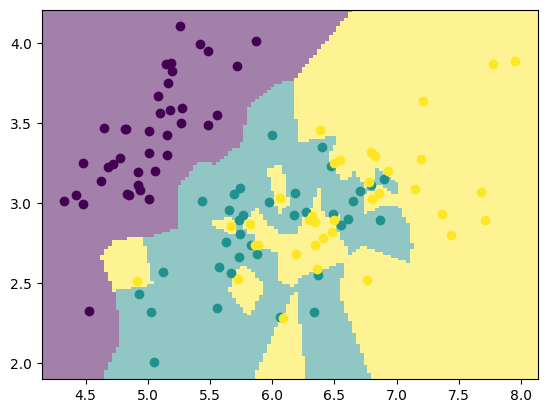

In [5]:
knn2D = ml.knn.knnClassify( Xtrain[:,:2], Ytrain, K )
ml.plotClassify2D( knn2D, Xtrain[:,0:2], Ytrain)  # make 2D classification plot with data (Xtr,Ytr)

This function plots the training data and colored points as per their labels, then calls knn's predict function
on a densely spaced grid of points in the 2D space, and uses this to produce the background color.
Calling the function with knn=None will plot only the data.

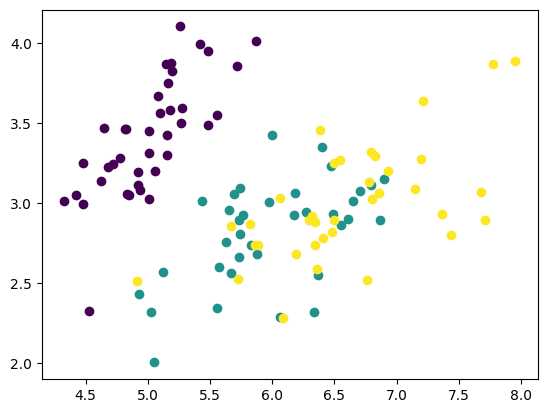

In [6]:
ml.plotClassify2D( None, Xtrain[:,0:2], Ytrain) 

<hr>

## Activity 1: Training a Classifier
Using the code above as an example, train a kNN classifier that uses only the first two features of X
(e.g., let X be only the first two columns of iris, instead of the first four) and visualize (plot) the classification boundary for varying values of K=[1, 5, 10, 50] using plotClassify2D. 

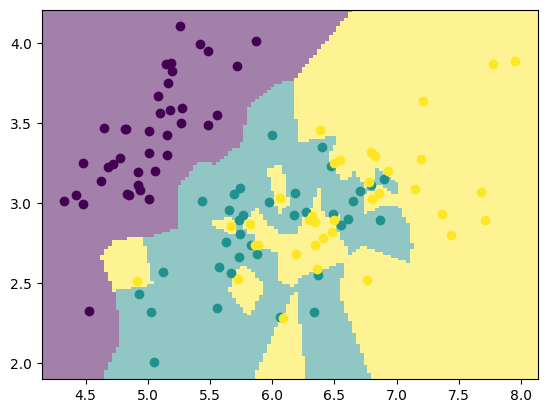

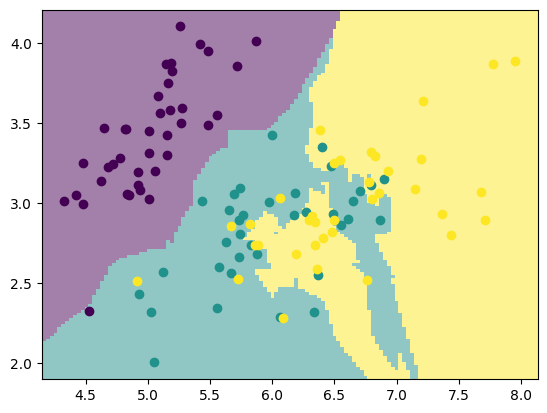

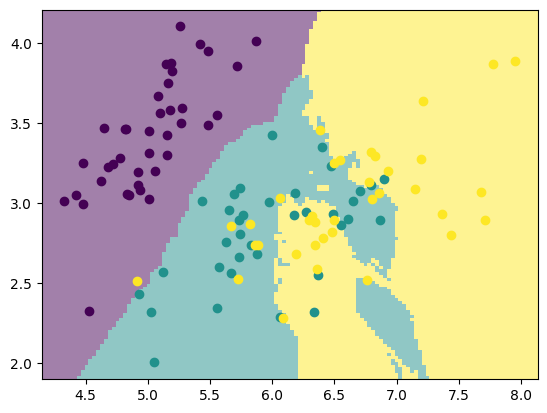

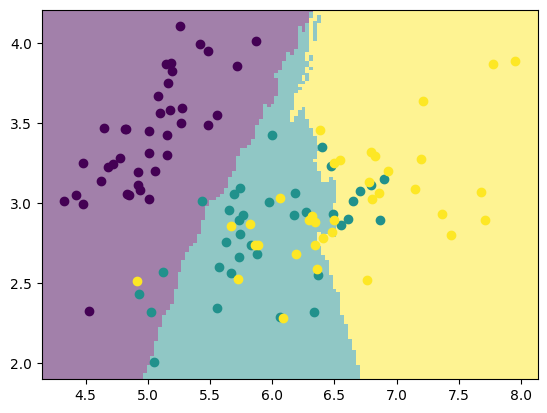

In [7]:
import matplotlib.pyplot as plt
K=[1, 5, 10, 50]

for i, k in enumerate(K):
    
    # TODO: build and train classifier using the first two features of Xtrain
    
    # TODO: plot decision boundary
     Y = iris[:,-1]              # target value (iris species) is the last column
     X = iris[:,0:2]             # features are the other columns, only first two columns
     np.random.seed(0)           # set the random number seed
     X,Y = ml.shuffleData(X,Y)  # shuffle data randomly
     Xtrain,Xval,Ytrain,Yval = ml.splitData(X,Y, 0.75)  # split data into 75/25 train/validation
    # unsure if this needs to be re-done, but better to just do it again in case
    #actually training now 
     knn2D = ml.knn.knnClassify( Xtrain[:,:2], Ytrain, K[i] )
    #getting each loop graph to appear seperately as opposed to all in one graph
     plt.figure()
     ml.plotClassify2D( knn2D, Xtrain[:,0:2], Ytrain)

plt.show()
    



# Evaluating kNN
After we've trained a model, we want to evaluate how well it performs, both on the training data and the validation data. To do this for our classification problem, we will compute the error rate (number of misclassifications). We can do this manually by generating predictions for our training and validation data based on the the classifier and comparing to the original data:

In [8]:
YtrainHat = knn2D.predict(Xtrain[:,:2])   # get estimates of y for each data point in Xtrain using our 2D kNN model
YvalHat = knn2D.predict(Xval[:,:2])     # get estimates of y for each data point in Xval

errT = np.sum(YtrainHat != Ytrain)/Ytrain.shape[0]      # get proportion of times the prediction doesn't match training
errV = np.sum(YvalHat != Yval)/Yval.shape[0]            # get proportion of times the prediction doesn't match validation

print(errT, errV)

0.26126126126126126 0.13513513513513514


mltools also contains a function that will do this comparison for us to generate the error rates:

In [9]:
print(knn2D.err(Xtrain[:,:2],Ytrain), knn2D.err(Xval[:,:2],Yval))

0.26126126126126126 0.13513513513513514


## Activity 2: Measuring Prediction Error 
Again using only the first two features, compute the error rate (number of misclassifications) on both the training and validation data as a function of K=[1, 2, 5, 10, 50, 100, 200].

Plot the resulting error rate functions with training error in red and validation error in green. You may find it useful to use a [semi-log plot](https://en.wikipedia.org/wiki/Semi-log_plot) to deal with the very different scales of the x-axis (K from 1 to 200) and the y-axis (error rate between 0 and 1). matplotlib will do the linear-log conversion for you with the [semilogx function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html).

You can do this most easily with a for-loop like the one below:

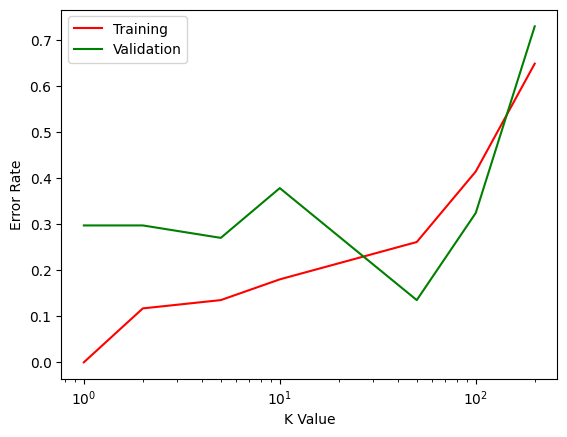

Error in Training Data:  [0.         0.11711712 0.13513514 0.18018018 0.26126126 0.41441441
 0.64864865]
Error in Validation Data:  [0.2972973  0.2972973  0.27027027 0.37837838 0.13513514 0.32432432
 0.72972973]


In [10]:
K=[1, 2, 5, 10, 50, 100, 200]
errTr = np.zeros(len(K))      # array for the training error of each k initialized to all zeros
errVa = np.zeros(len(K))      # array for the validation error of each k initialized to all zeros 
for i, k in enumerate(K):

        
    # TODO: build and train classifier using the first two features of Xtrain for the current value of k
     Y = iris[:,-1]              # target value (iris species) is the last column
     X = iris[:,0:2]             # features are the other columns, only first two columns
     np.random.seed(0)           # set the random number seed
     X,Y = ml.shuffleData(X,Y)  # shuffle data randomly
     Xtrain,Xval,Ytrain,Yval = ml.splitData(X,Y, 0.75)  # split data into 75/25 train/validation
    # unsure if this needs to be re-done, but better to just do it again in case
    #actually training now 
     knn2D = ml.knn.knnClassify( Xtrain[:,:2], Ytrain, K[i] )
    
    # TODO: Compute error for training and save in errTr[i]
     YtrainHat = knn2D.predict(Xtrain[:,:2])   # get estimates of y for each data point in Xtrain using our 2D kNN model
     YvalHat = knn2D.predict(Xval[:,:2])     # get estimates of y for each data point in Xval

     errT = np.sum(YtrainHat != Ytrain)/Ytrain.shape[0]      # get proportion of times the prediction doesn't match training
     errV = np.sum(YvalHat != Yval)/Yval.shape[0]  
     # get proportion of times the prediction doesn't match validation
     # putting error amounts into array constructed above 
     errTr[i] = errT # needs to be RED
     errVa[i] = errV # needs to be GREEN
    
# TODO: plot training errors in red

# TODO: plot validation errors in green
#setting axes
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.semilogx(K,errTr, label = "Training", color = "red")
plt.semilogx(K, errVa, label = "Validation", color = "green")
plt.legend()
plt.show()
print("Error in Training Data: ", errTr)
print("Error in Validation Data: ",errVa)



<span style="color:blue">**Based on these plots, what value of K would you recommend? Why?**</span>

Based on these plots, I would recommend a K value of 50. This produces a comparitively low margin of error in the validation data, even though it's error on the training data is pretty midling. I think these two values averaged together produce the best results when K is 50.

## Activity 3: Retraining the Model
Create the same error rate plots as the previous part, but with all the features in the dataset. 

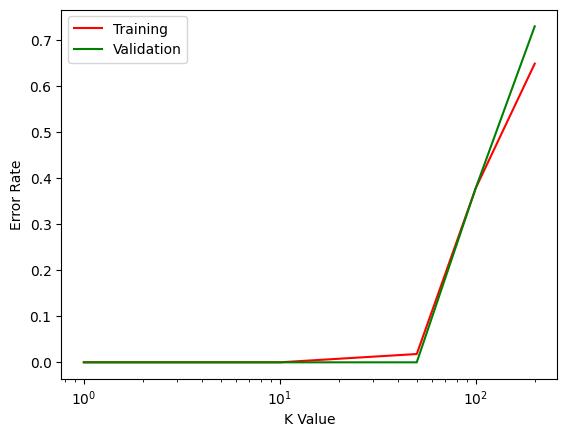

Error in Training Data:  [0.         0.         0.         0.         0.01801802 0.37837838
 0.64864865]
Error in Validation Data:  [0.         0.         0.         0.         0.         0.37837838
 0.72972973]


In [11]:
# TODO: Retrain the classifiers with varying values for k using all
# four features in the iris data and plot the prediction error results
K=[1, 2, 5, 10, 50, 100, 200]
errTr = np.zeros(len(K))      # array for the training error of each k initialized to all zeros
errVa = np.zeros(len(K))      # array for the validation error of each k initialized to all zeros 
for i, k in enumerate(K):

        
    # TODO: build and train classifier using the first two features of Xtrain for the current value of k
     Y = iris[:,-1]              # target value (iris species) is the last column
     X = iris[:]             # fall columns now 
     np.random.seed(0)           # set the random number seed
     X,Y = ml.shuffleData(X,Y)  # shuffle data randomly
     Xtrain,Xval,Ytrain,Yval = ml.splitData(X,Y, 0.75)  # split data into 75/25 train/validation
    # unsure if this needs to be re-done, but better to just do it again in case
    #actually training now 
     knn = ml.knn.knnClassify( Xtrain[:], Ytrain, K[i] )
    
    # TODO: Compute error for training and save in errTr[i]
     YtrainHat = knn.predict(Xtrain[:])   # get estimates of y for each data point in Xtrain using our 2D kNN model
     YvalHat = knn.predict(Xval[:])     # get estimates of y for each data point in Xval

     errT = np.sum(YtrainHat != Ytrain)/Ytrain.shape[0]      # get proportion of times the prediction doesn't match training
     errV = np.sum(YvalHat != Yval)/Yval.shape[0]  
     # get proportion of times the prediction doesn't match validation
     # putting error amounts into array constructed above 
     errTr[i] = errT # needs to be RED
     errVa[i] = errV # needs to be GREEN
    
# TODO: plot training errors in red

# TODO: plot validation errors in green
#setting axes
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.semilogx(K,errTr, label = "Training", color = "red")
plt.semilogx(K, errVa, label = "Validation", color = "green")
plt.legend()
plt.show()
print("Error in Training Data: ",errTr)
print("Error in Validation Data: ",errVa)

<span style="color:blue">**Are the plots very different? Is your recommendation for the best K different?**</span>

These plots are very different, as we can see the curves are pleaning towards overfitting. Based upon this data, I would still recommend a K value of 50, though. At 50 is when we begin to see a slight error in the training data. I would prefer to have some error than none at all in this training data to avoid overfitting.I think this would make our error rate lower if we were to introduce new data, say 1000 more irises. 

# Statement of Collaboration
All students are required to follow the academic honesty guidelines presented in the course syllabus.
For homework assignments, I encourage students to organize to discuss the task descriptions, requirements, possible bugs in the support code, and the relevant technical content *before* they start working on it. However, the final submission must be your own work. 
    
Please provide a brief statement of collaboration, including the names of everyone involved in any discussions (especially in-person ones), and what was discussed.
